# Introduction to Data Manipulation and Visualisations in Python

In this notebook, we shall show you how to manipulate an example dataset and visualise it in Python. This is commonly refered to as Exploratory Data Analysis (EDA) amongst Data Scientists. This is only an introduction and there are many other ways to manipulate and visualise data, just look online!

This notebook is organised as follows:

1. Reading in the Data
2. Cleaning up the Data
3. Understanding the Data
4. Visualising the Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading in the Data

First stage of any Python data analysis is to first pull in all of the data into a local representation (a variable). For this tutorial, we will be using Pandas Dataframes, a common tool for data wrangling. See the cheatsheet within this directory for more cool tricks with Pandas Dataframes.

The dataset used in this tutorial is from Kaggle: 

Heart Disease UCI on #kaggle via @KaggleDatasets https://kaggle.com/ronitf/heart-disease-uci?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter

The easiest and most common format to receive data in is a CSV. Other formats work well too (e.g. JSON, TXT, XML)

1. Read `heart.csv` into a pandas dataframe and print out its `shape`

In [3]:
heart = pd.read_csv("heart.csv")

print(heart.shape)

(303, 14)


2. Show the `head` or preview of the data

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,T
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,T
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,T
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,T
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,T


3. Extract the labels from the data and store them as an `array` in a variable called `y`. Then print the first 10 values to make sure you stored them correctly as an `array`.

In [5]:
# Extract the labels from the data
y = np.array(heart.target)
print(y[1:10])

['T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T']


4. Remove the labels from the data we could use to train a model and store the remaining columns in a variable called `X_df` (`_df` is appended to remember this is a dataframe object still). Print a preview of the first 10 rows to make sure you did this.

In [6]:
# Remove the label column from the data used for training and testing
X_df = heart.drop(['target'],1)
X_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2


## Cleaning up the Data

Now that we have the data within Pandas Dataframes, it will be a bit easier to manipulate the data and clean up any errors we might not have expected to find. To do this, ask yourself, "What do I expect the data to look like in each column?" and then check it!

According to the website, this is what the dataset should look like...

`age`: age in years

`sex`: male, female

`cp`: chest pain type (4 values)

`trestbps`: resting blood pressure (in mm Hg on admission to the hospital)

`chol`: serum cholestoral in mg/dl

`fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

`restecg`: resting electrocardiographic results (values: 0, 1, 2)

`thalach`: maximum heart rate achieved

`exang`: exercise induced angina (1 = yes; 0 = no)

`oldpeak`: ST depression induced by exercise relative to rest

`slope`: the slope of the peak exercise ST segment

`ca`: number of major vessels (0-3) colored by flourosopy

`thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

`target`: T or F (heart disease present or not, respectively)

5. Using native dataframe functions, `describe` the values in the `age` column.

In [7]:
X_df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

6. Using native dataframe functions, how many male and female patients are there?

In [8]:
X_df['sex'].describe()

count      303
unique       2
top       male
freq       207
Name: sex, dtype: object

7. Using native dataframe functions, check how many different values are stored in the `cp` column with a single function.

In [9]:
X_df['cp'].count()

303

8. Sometimes the functions you want to use will not be compatible with pandas dataframe objects. Try checking what unique values are in `restecg` after storing the values as an `array`.

In [10]:
restecg = X_df['restecg']
restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

9. Try replacing the name `oldpeak` to `stdepress`.

In [11]:
X_df.rename(columns = {'oldpeak':'stdepress'}, inplace = True)

10. Change the values in `sex` to be numbers (male = 1, female = 0). Hint: Try `apply`ing a `lambda` function

In [12]:
X_df['sex'] = X_df['sex'].apply(lambda gender: 1 if gender == 'male' else 0)

11. Translate the `T` and `F` values in the labels to numerical values (1 and 0, respectively). Be careful not to change the order!

In [13]:
y = np.array(list(map(lambda output: 1 if output == 'T' else 0, y)))

This is relatively clean data, i.e. with no null or NA values. Not every dataset will be this nice. Use the included cheatsheets for additional commands that may be useful in the future.

## Understanding the Data

What other trends should the data have that are more than just a description? Should there be more of one type of feature than another? Check these and see what is important.

12. What is the average age? Maximum cholesterol level? Find a way to `describe` every column of the data in one view.

The mean age is: 54.366336633663366
The max cholesterol is: 564


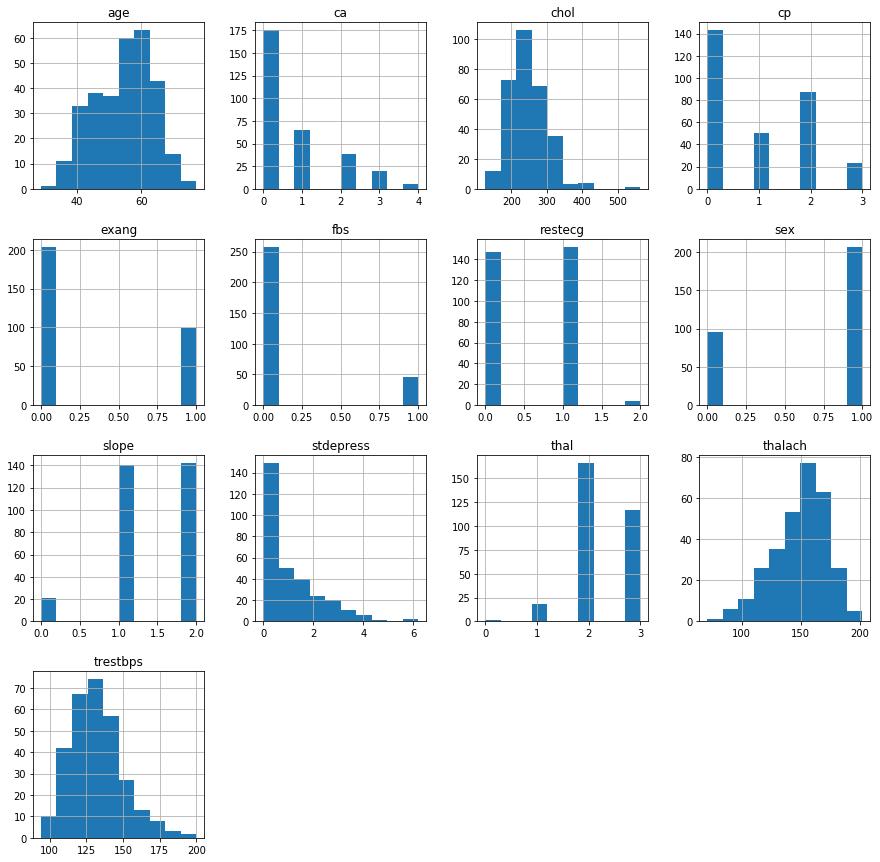

In [14]:
print("The mean age is:",X_df.age.mean())
print("The max cholesterol is:", X_df.chol.max())
X_df.hist(figsize = (15,15));

13. Is everything as it says it should be? Does the data seem to match the description? Does it make sense?

In [15]:
I want to say yes

SyntaxError: invalid syntax (<ipython-input-15-8f2c7d68a322>, line 1)

## Visualing the Data

Numbers are great for expressing quantifiable information, but "a picture says a thousand words"...

14. Make a pie chart to visualise the balance of male to female patients

In [ ]:
plt.pie(X_df.sex.value_counts(), labels = ['male','female']);

15. Make a box & whisker plot to visualise the ages of the patients.

In [ ]:
plt.boxplot(X_df['age']);

16. Make a box & whisker plot to visualise the ages with respect to whether the heart disease is present or not.

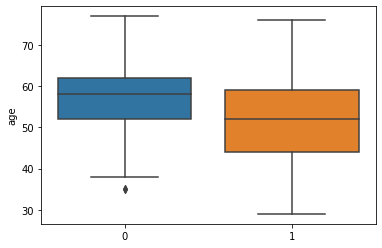

In [20]:
sns.boxplot(y = X_df['age'], x = y);

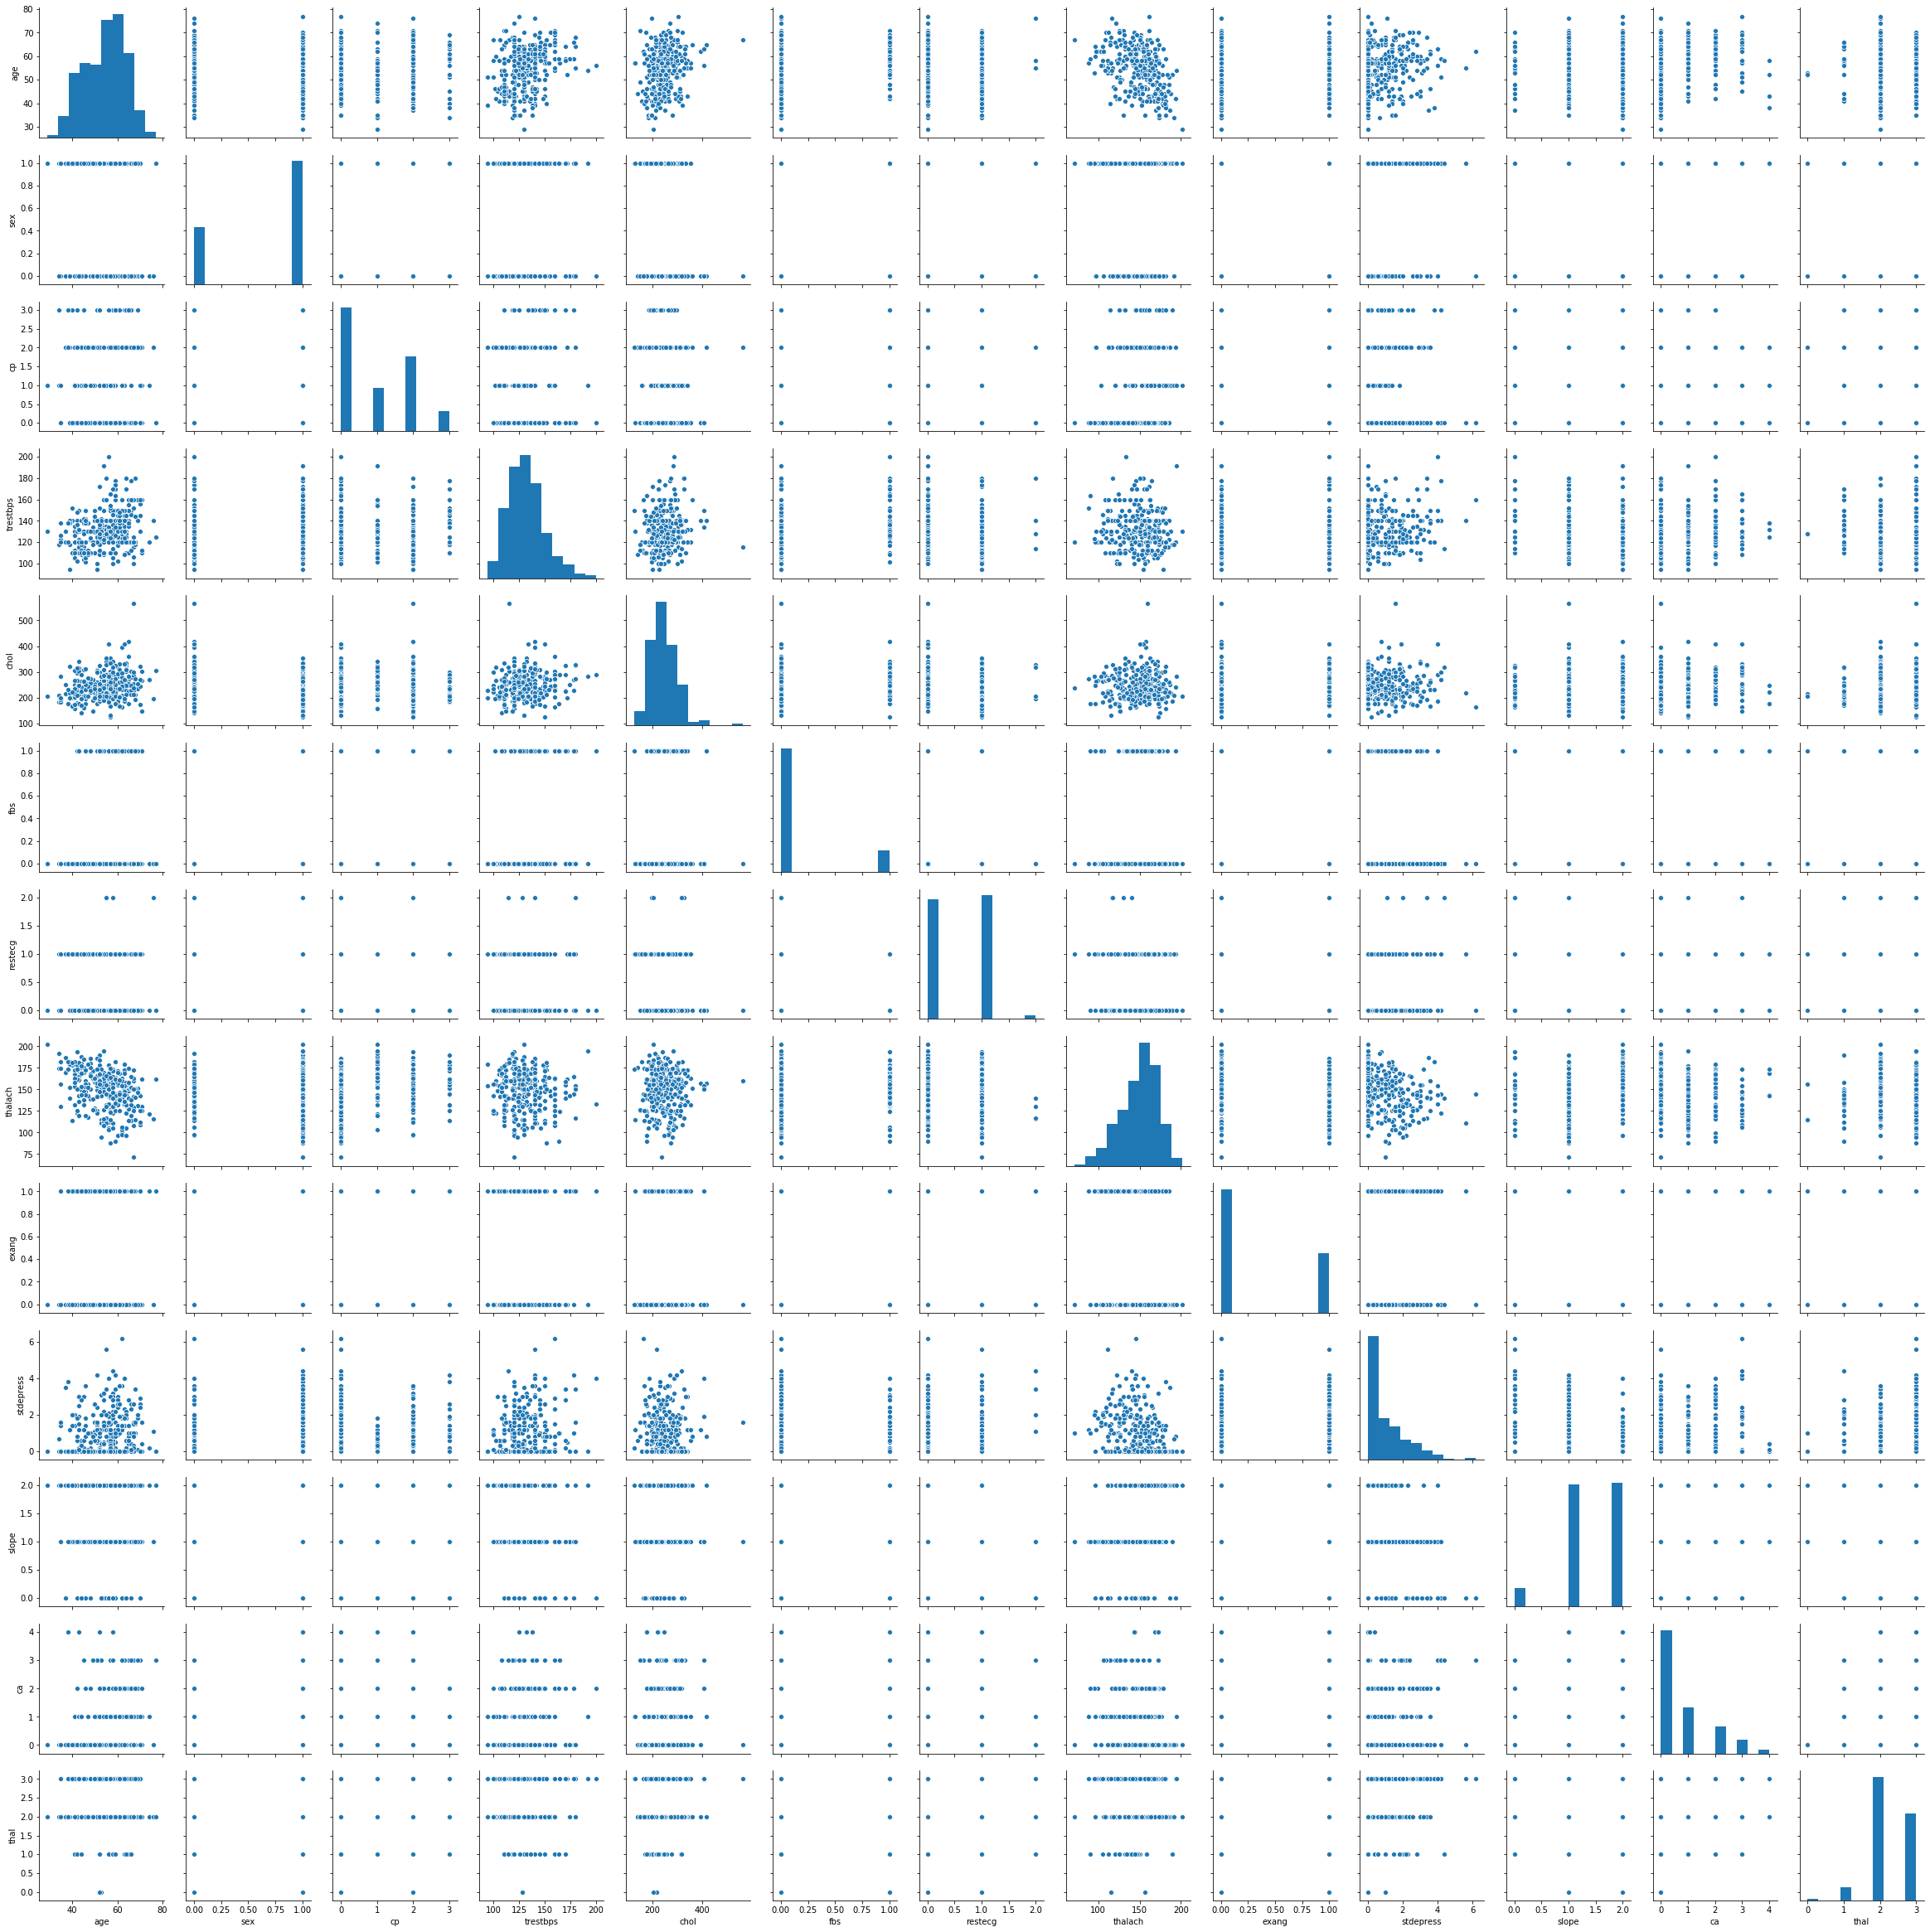

In [126]:
sns.pairplot(X_df);

Now make a nifty visualisation on your own!

# References

* https://towardsdatascience.com/exploratory-analysis-python-kaggle-data-b0afb6ec1788
* https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html